In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date, datetime, time


In [395]:
df = pd.read_csv(r"C:/Users/abdul\Desktop/Twuaiq projects\week3.project3\Amazon-Delivery-GeoAnalytics\Dataset/amazon_delivery.csv")
df.info()
print(" First 5 rows",df.head())       # First 5 rows
print(" Data types & null values",df.info())       # Data types & null values
print("Data describtion",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
 

In [396]:
print("null value number",df.isnull().sum())
print("number of duplicates",df.duplicated().sum())

null value number Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64
number of duplicates 0


In [397]:
# Filter invalid coordinates
#df = df[(df['Store_Latitude'].between(-90, 90)) & (df['Store_Longitude'].between(-180, 180))]
# Check if all latitudes are valid
valid_lat = df['Store_Latitude'].between(-90, 90).all()

# Check if all longitudes are valid
valid_lon = df['Store_Longitude'].between(-180, 180).all()

print("Latitude values valid:", valid_lat)
print("Longitude values valid:", valid_lon)

Latitude values valid: True
Longitude values valid: True


In [398]:
#df = df[(df['Drop_Latitude'].between(-90, 90)) & (df['Drop_Longitude'].between(-180, 180))]
valid_lat = df['Drop_Latitude'].between(-90, 90).all()

# Check if all longitudes are valid
valid_lon = df['Drop_Longitude'].between(-180, 180).all()
print("Latitude values valid:", valid_lat)
print("Longitude values valid:", valid_lon)

Latitude values valid: True
Longitude values valid: True


In [399]:
#unique values on catagoricals data
exp_col=['Weather', 'Traffic' , 'Vehicle','Area','Category']

for col in exp_col:
    print(f"Unique values in '{col}':")
    print(df[col].value_counts())

Unique values in 'Weather':
Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64
Unique values in 'Traffic':
Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64
Unique values in 'Vehicle':
Vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64
Unique values in 'Area':
Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64
Unique values in 'Category':
Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name:

Data Cleaning

In [400]:
cleanDf=df.copy()

#dropping duplicates on Agent_Rating , Weather
cleanDf= df.dropna(subset=["Agent_Rating" ,"Weather"])
print("number of duplicates",cleanDf.duplicated().sum())

cleanDf

number of duplicates 0


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [401]:
categorical_columns = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

for col in categorical_columns:
    print(f'{col}:')
    print("--------------")
    print(cleanDf[col].unique())   
    print("==============")

Weather:
--------------
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Traffic:
--------------
['High ' 'Jam ' 'Low ' 'Medium ']
Vehicle:
--------------
['motorcycle ' 'scooter ' 'van']
Area:
--------------
['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
Category:
--------------
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


In [402]:
for col in cleanDf.columns:
    print(f"{col}: {cleanDf[col].nunique()} unique values")

Order_ID: 43594 unique values
Agent_Age: 20 unique values
Agent_Rating: 26 unique values
Store_Latitude: 489 unique values
Store_Longitude: 389 unique values
Drop_Latitude: 4365 unique values
Drop_Longitude: 4365 unique values
Order_Date: 44 unique values
Order_Time: 176 unique values
Pickup_Time: 193 unique values
Weather: 6 unique values
Traffic: 4 unique values
Vehicle: 3 unique values
Area: 4 unique values
Delivery_Time: 89 unique values
Category: 16 unique values


In [403]:
cleanDf.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [404]:
#check if there is rating more thsn 5

cleanDf[cleanDf["Agent_Rating"]>5]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [405]:
cleanDf.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,17.244769,70.768898,17.461540,70.832489,124.916433
std,5.760689,0.313827,7.690005,21.128773,7.338199,21.128940,51.941975
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.986054,73.280000,90.000000
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002471,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.102309,160.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [406]:
#to diaplay rows with missing values
cleanDf[cleanDf.isnull().any(axis=1)]


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [407]:
cleanDf['Weather'].mode()


0    Fog
Name: Weather, dtype: object

In [429]:
cleanDf['Order_Date'] = pd.to_datetime(cleanDf['Order_Date'], errors='coerce')


C:\Users\abdul\AppData\Local\Temp\ipykernel_31116\1824210060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Order_Date'] = pd.to_datetime(cleanDf['Order_Date'], errors='coerce')


In [432]:

cleanDf['Order_of_week_day'] = cleanDf['Order_Date'].dt.day_of_week
cleanDf['Order_Month'] = cleanDf['Order_Date'].dt.month

cleanDf

C:\Users\abdul\AppData\Local\Temp\ipykernel_31116\2129793433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Order_of_week_day'] = cleanDf['Order_Date'].dt.day_of_week
C:\Users\abdul\AppData\Local\Temp\ipykernel_31116\2129793433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Order_Month'] = cleanDf['Order_Date'].dt.month


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_of_week_day,Order_Month
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,5,3
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4,3
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,5,3
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,1,4
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,3,3
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,2,2
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4,3
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,0,3


In [ ]:
print(cleanDf[['Order_Date', 'Order_of_week_day', 'Order_Month']].head())


  Order_Date  Order_of_week_day  Order_Month
0 2022-03-19                  5            3
1 2022-03-25                  4            3
2 2022-03-19                  5            3
3 2022-04-05                  1            4
4 2022-03-26                  5            3


Univariate Analysis using seaborn and matplot

<Axes: xlabel='Agent_Age'>

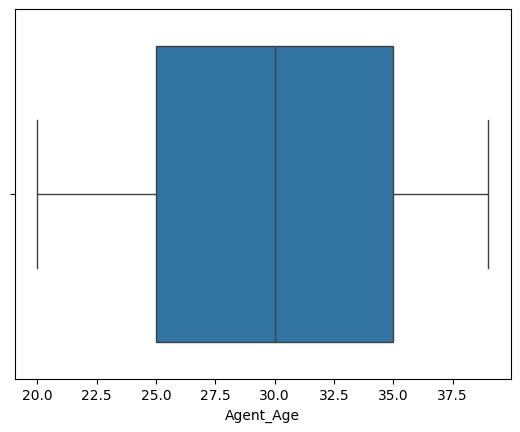

In [ ]:
sns.boxplot(x=cleanDf['Agent_Age'])


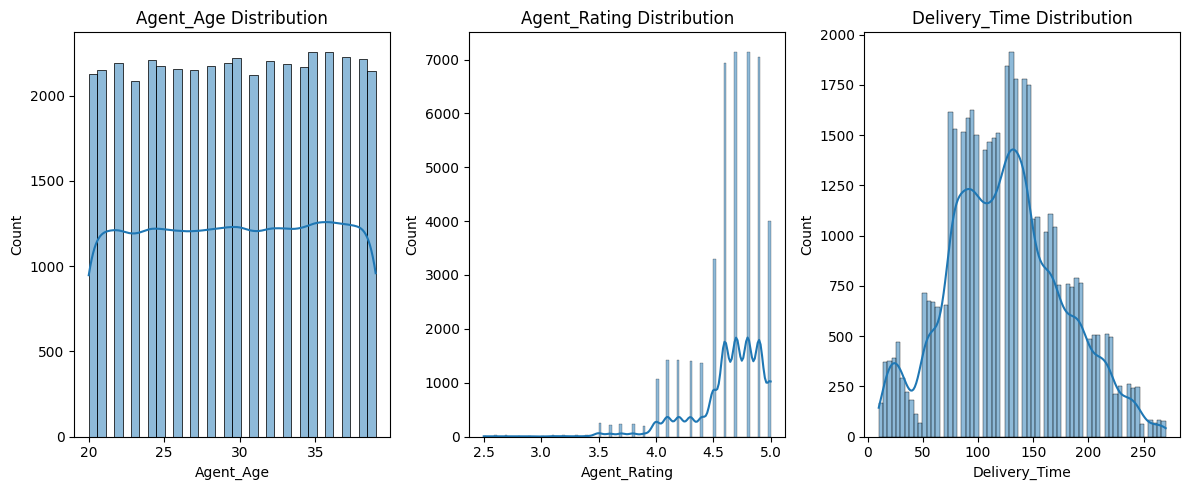

In [ ]:
plt.figure(figsize = (12,5))
plot_cols = ['Agent_Age', 'Agent_Rating', 'Delivery_Time']
for i,col in enumerate(plot_cols,1):
    plt.subplot(1,3,i)
    sns.histplot(x = cleanDf[col], kde = True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

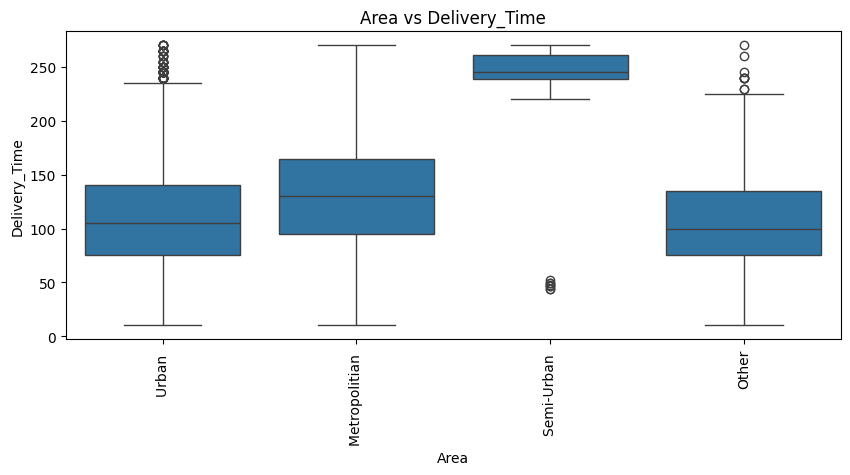

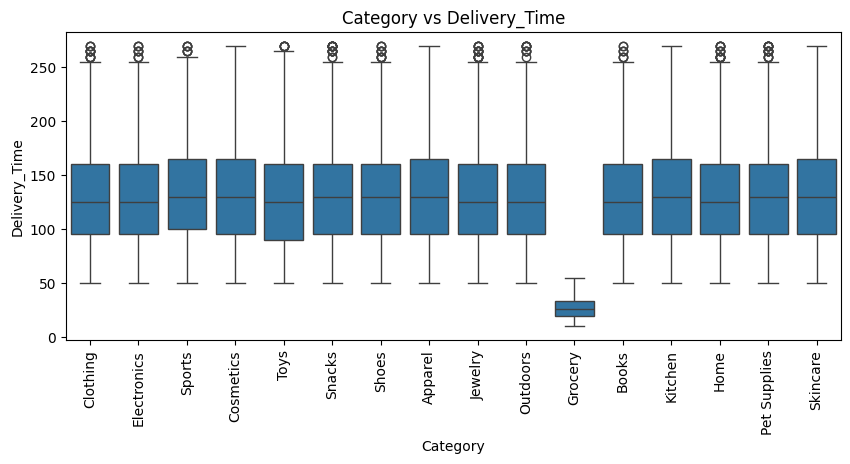

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=cleanDf, x='Area', y='Delivery_Time')
plt.title('Area vs Delivery_Time')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=cleanDf, x='Category', y='Delivery_Time')
plt.title('Category vs Delivery_Time')
plt.xticks(rotation=90)
plt.show()

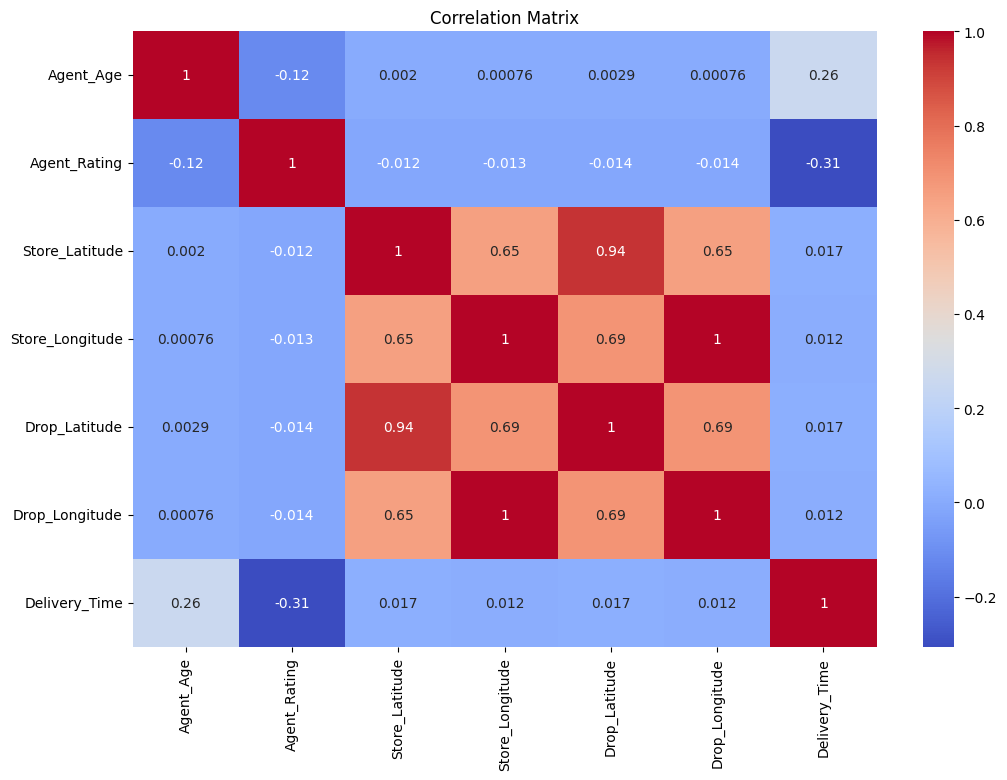

In [420]:
numeric_cols = cleanDf.select_dtypes(include = np.number).columns
plt.figure(figsize =(12,8))
sns.heatmap(cleanDf[numeric_cols].corr(), annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()